In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [24]:
from sklearn import ensemble, cross_validation, learning_curve, metrics, datasets, tree

import numpy as np
import pandas as pd

In [7]:
digits = datasets.load_digits()

In [16]:
print digits

{'images': array([[[  0.,   0.,   5., ...,   1.,   0.,   0.],
        [  0.,   0.,  13., ...,  15.,   5.,   0.],
        [  0.,   3.,  15., ...,  11.,   8.,   0.],
        ..., 
        [  0.,   4.,  11., ...,  12.,   7.,   0.],
        [  0.,   2.,  14., ...,  12.,   0.,   0.],
        [  0.,   0.,   6., ...,   0.,   0.,   0.]],

       [[  0.,   0.,   0., ...,   5.,   0.,   0.],
        [  0.,   0.,   0., ...,   9.,   0.,   0.],
        [  0.,   0.,   3., ...,   6.,   0.,   0.],
        ..., 
        [  0.,   0.,   1., ...,   6.,   0.,   0.],
        [  0.,   0.,   1., ...,   6.,   0.,   0.],
        [  0.,   0.,   0., ...,  10.,   0.,   0.]],

       [[  0.,   0.,   0., ...,  12.,   0.,   0.],
        [  0.,   0.,   3., ...,  14.,   0.,   0.],
        [  0.,   0.,   8., ...,  16.,   0.,   0.],
        ..., 
        [  0.,   9.,  16., ...,   0.,   0.,   0.],
        [  0.,   3.,  13., ...,  11.,   5.,   0.],
        [  0.,   0.,   0., ...,  16.,   9.,   0.]],

       ..., 
       [[ 

In [13]:
print digits.DESCR

Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an input matrix of 8x8 where each element is a

In [20]:
print digits.data.shape, '\n', digits.data

(1797L, 64L) 
[[  0.   0.   5. ...,   0.   0.   0.]
 [  0.   0.   0. ...,  10.   0.   0.]
 [  0.   0.   0. ...,  16.   9.   0.]
 ..., 
 [  0.   0.   1. ...,   6.   0.   0.]
 [  0.   0.   2. ...,  12.   0.   0.]
 [  0.   0.  10. ...,  12.   1.   0.]]


In [19]:
print digits.target.shape, '\n', digits.target

(1797L,) 
[0 1 2 ..., 8 9 8]


In [31]:
data = digits.data
target = digits.target

## 1) работаем с DecisionTreeClassifier

In [47]:
DT_claccifier = tree.DecisionTreeClassifier()

In [48]:
cv_score_DT = cross_validation.cross_val_score(DT_claccifier, data, target, cv=10)

In [49]:
cv_score_DT.mean()

0.82316438731566277

In [35]:
'''def write_answer_1(ans):
    with open("ans1.txt", "w") as fout:
        fout.write(str(ans))'''

In [36]:
'''write_answer_1(cv_score.mean())'''

In [50]:
def write_answer_1(ans):
    fout = open("ans1.txt", "w")
    return fout.write(str(ans))

In [52]:
write_answer_1(cv_score_DT.mean())

## 2) работаем с беггингом - BaggingClassifier

In [62]:
bagg_classifier = ensemble.BaggingClassifier(base_estimator=DT_claccifier, n_estimators=100)

In [53]:
cv_score_bagg = cross_validation.cross_val_score(bagg_classifier, data, target, cv=10)

In [58]:
print cv_score_bagg, '\n\nmean =', cv_score_bagg.mean()

[ 0.89189189  0.95081967  0.90055249  0.93888889  0.91620112  0.98882682
  0.96648045  0.90449438  0.8700565   0.91477273] 

mean = 0.924298492546


In [55]:
def write_answer_2(ans):
    fout = open("ans2.txt", "w")
    return fout.write(str(ans))

In [59]:
write_answer_2(cv_score_bagg.mean())

## 3) исследуем BaggingClassifier: пробуем sqrt(d) признаков

In [72]:
bagg_classifier_sqrt = ensemble.BaggingClassifier(base_estimator=DT_claccifier, n_estimators=100, max_features=sqrt(1))

In [73]:
cv_score_bagg_sqrt = cross_validation.cross_val_score(bagg_classifier_sqrt, data, target, cv=10)

In [74]:
print cv_score_bagg_sqrt, '\n\nmean =', cv_score_bagg_sqrt.mean()

[ 0.87567568  0.9726776   0.91712707  0.93333333  0.9273743   0.98882682
  0.95530726  0.90449438  0.86440678  0.92045455] 

mean = 0.925967776349


In [75]:
def write_answer_3(ans):
    fout = open("ans3.txt", "w")
    return fout.write(str(ans))

In [76]:
write_answer_3(cv_score_bagg_sqrt.mean())

## 4) продвинутый вариант BaggingClassifier: пробуем sqrt(d) признаков, НО каждый раз по-новому при построении КАЖДОЙ вершины дерева

In [77]:
DT_claccifier_sqrt = tree.DecisionTreeClassifier(max_features='sqrt')

In [78]:
bagg_classifier_sqrt_up = ensemble.BaggingClassifier(base_estimator=DT_claccifier_sqrt, n_estimators=100)

In [79]:
cv_score_bagg_sqrt_up = cross_validation.cross_val_score(bagg_classifier_sqrt_up, data, target, cv=10)

In [80]:
print cv_score_bagg_sqrt_up, '\n\nmean =', cv_score_bagg_sqrt_up.mean()

[ 0.90810811  0.98360656  0.95027624  0.95        0.94972067  0.97765363
  0.97206704  0.97191011  0.91525424  0.94886364] 

mean = 0.952746023537


In [81]:
def write_answer_4(ans):
    fout = open("ans4.txt", "w")
    return fout.write(str(ans))

In [82]:
write_answer_4(cv_score_bagg_sqrt_up.mean())

## 5) сравнение с  RandomForestClassifier

In [87]:
 rf_classifier = ensemble.RandomForestClassifier(n_estimators=100)

In [88]:
cv_score_rf_classifier = cross_validation.cross_val_score(rf_classifier, data, target, cv=10)

In [119]:
print cv_score_rf_classifier, '\n'*2, 'mean =', cv_score_rf_classifier.mean()

[ 0.9027027   0.97814208  0.93922652  0.96666667  0.95530726  0.96648045
  0.98882682  0.96067416  0.94350282  0.92613636] 

mean = 0.952766583615


In [114]:
answer5 = '2 3 4 7'

In [125]:
def write_answer_5(ans):
    fout = open("ans5.txt", "w")
    return fout.write(str(ans))

In [122]:
def write_answer(ans, number):
    name = 'ans' + str(number) + '.txt'
    fout = open(name, "w")
    return fout.write(str(ans))

In [123]:
write_answer(answer5, 6)

In [116]:
write_answer_5(answer5)

In [117]:
print answer5

2 3 4 7


## 5.1) Исследование классификатора RandomForestClassifier 

In [128]:
cross_validation.cross_val_score(ensemble.RandomForestClassifier(n_estimators=100), data, target, cv=10).mean()

0.95220908272620908

### а) зависимость качества от числа деревьев

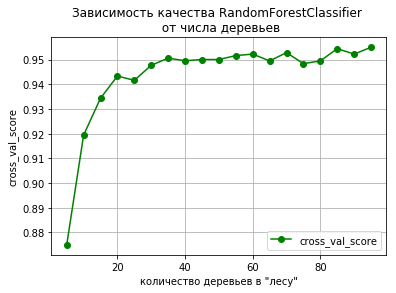

In [151]:
pylab.grid(True)
X = np.arange(5, 100, 5)
pylab.plot(X, 
           [cross_validation.cross_val_score(ensemble.RandomForestClassifier(n_estimators=N), 
                                             data, target, cv=10).mean() for N in X] , 'g-', marker='o', label='cross_val_score')
pylab.legend(loc='lower right')
#pylab.ylim((0.85, 1.00))
pylab.title(u'Зависимость качества RandomForestClassifier \n от числа деревьев')
pylab.xlabel(u'количество деревьев в "лесу"')
pylab.ylabel(u'cross_val_score')

### б) зависимость качества от числа признаков

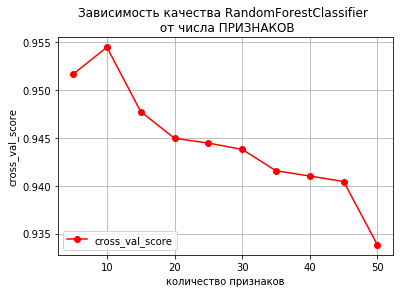

In [154]:
pylab.grid(True)
X = np.arange(5, 55, 5)
pylab.plot(X, 
           [cross_validation.cross_val_score(ensemble.RandomForestClassifier(n_estimators=100, max_features=F), 
                                             data, target, cv=10).mean() for F in X] , 'r-', marker='o', label='cross_val_score')
pylab.legend(loc='lower left')
#pylab.ylim((0.85, 1.00))
pylab.title(u'Зависимость качества RandomForestClassifier \n от числа ПРИЗНАКОВ')
pylab.xlabel(u'количество признаков')
pylab.ylabel(u'cross_val_score')

### в) зависимость качества от максимальной ГЛУБИНЫ ДЕРЕВЬЕВ

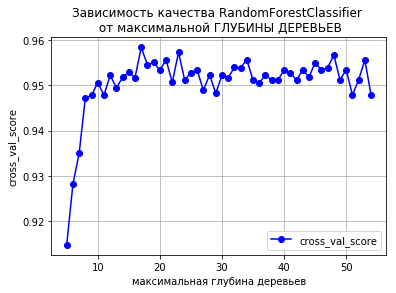

In [156]:
pylab.grid(True)
X = np.arange(5, 55, 1)
pylab.plot(X, 
           [cross_validation.cross_val_score(ensemble.RandomForestClassifier(n_estimators=100, max_depth=MD), 
                                             data, target, cv=10).mean() for MD in X] , 'b-', marker='o', label='cross_val_score')
pylab.legend(loc='lower right')
#pylab.ylim((0.85, 1.00))
pylab.title(u'Зависимость качества RandomForestClassifier \n от максимальной ГЛУБИНЫ ДЕРЕВЬЕВ')
pylab.xlabel(u'максимальная глубина деревьев')
pylab.ylabel(u'cross_val_score')